딥러닝 기초
===
## 머신러닝
* 데이터를 이용해 미지의 일을 예측하기 위해 만들어진 기법
* 일반적인 프로그램이 데이터를 넣어서 답을 도출하는 과정이라면,   
  데이터를 통해 규칙을 찾아내는 것이 머신러닝의 본질적 과정.
## 학습(training)
* 데이터가 입력되고 패턴이 분석되는 과정
* 예시 :
  1. 기존 환자 데이터를 입력(진료 기록과 사망·생존 여부)
  2. 머신러닝으로 학습(규칙 발견)
  3. 새로운 환자 예측
* 랜덤포레스트, SVM, DeepLearning 등 려러가지 머신러닝 기법들이 존재
## 예제를 통한 이해
### 데이터 살펴보기 : ThoraricSurgery.csv
* shape = (470, 18)
* 속성(attribute), 특성(feature) X : 수술 환자 기록 17개 변수(종양 유형, 폐활량, 호흡곤란 여부 등)
* 클래스 Y : 생존/사망
* 딥러닝을 구동시키려면 '속성'만을 뽑아 데이터셋을 만들고, '클래스'를 담는 데이터셋을 또 따로 만들어 줘야 함

In [2]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옴
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옴
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터를 불러들임
Data_set = np.loadtxt("./csv_data/ThoraricSurgery.csv", delimiter=",")

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:,0:17]
Y = Data_set[:, 17]

# 딥러닝 구조를 결정함(모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(30, input_dim=17, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# 딥러닝을 실행함
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 808us/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/100
47/47 [==============================] - 0s 871us/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 630us/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - 0s 699us/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 701us/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/100
47/47 [==============================] - 0s 754us/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 619us/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 701us/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0s 677us/step - loss: 0.4317 - accuracy

* loss는 예측이 실패할 확률, accuracy는 예측이 성공할 확률.
* 예측 성공률은 데이터를 분석해 데이터를 확장하거나, 딥러닝 구조를 적절하게 바꾸는 등의 노력으로 더 향상될 수 있음.
* 뿐만 아니라 학습에 사용되지 않은 데이터를 따로 모아 테스트를 해보면서 예측 성공률이 저알로 가능한지를 확인하는 과정까지 거치게 됨.
* 이러한 '최적화 과정'을 진행하려면 딥러닝의 구동 원리를 이해해야 함
### 과정
* Sequential()함수는 딥러닝의 구조를 한층한층 쉽게 쌓아올릴 수 있게 해 줌.
* Sequential()함수를 선언하고 나서 model.add()함수를 사용해 필요한 층을 차례로 추가하면 됨.
* 위의 코드에서 model.add()함수를 이용해 두 개의 층을 쌓아 올림.
  * activation : 다음 층으로 어떻게 값을 넘길지 결정하는 부분.   
  가장 많이 사용되는 함수 : relu() 함수, sigmoid() 함수.
  * loss : 한 번 신경망이 실행될 때마다 오차 값을 추적하는 함수.
  * optimizer : 오차를 어떻게 줄요 나갈지 정하는 함수.
* 층의 개수는 데이터에 따라 결정.
* 딥러닝의 구조와 층별 옵션을 정하고 나면 complie()함수를 이용해 이를 실행
* 입력값이 네트워크 층을 거치면 예측값을 나오고, 이를 실제값과 비교해서 Loss Score를 계산한 후에 Optimizer를 통해 Weight를 업데이트 함.
#### 기타 예제

Epoch 1/30
200/200 [==============================] - 0s 453us/step - loss: 1.6042 - mse: 1.6042
Epoch 2/30
200/200 [==============================] - 0s 457us/step - loss: 0.1634 - mse: 0.1634
Epoch 3/30
200/200 [==============================] - 0s 435us/step - loss: 0.1541 - mse: 0.1541
Epoch 4/30
200/200 [==============================] - 0s 477us/step - loss: 0.1425 - mse: 0.1425
Epoch 5/30
200/200 [==============================] - 0s 550us/step - loss: 0.1308 - mse: 0.1308
Epoch 6/30
200/200 [==============================] - 0s 468us/step - loss: 0.1250 - mse: 0.1250
Epoch 7/30
200/200 [==============================] - 0s 462us/step - loss: 0.1166 - mse: 0.1166
Epoch 8/30
200/200 [==============================] - 0s 489us/step - loss: 0.1131 - mse: 0.1131
Epoch 9/30
200/200 [==============================] - 0s 493us/step - loss: 0.1078 - mse: 0.1078
Epoch 10/30
200/200 [==============================] - 0s 458us/step - loss: 0.1036 - mse: 0.1036
Epoch 11/30
200/200 [========

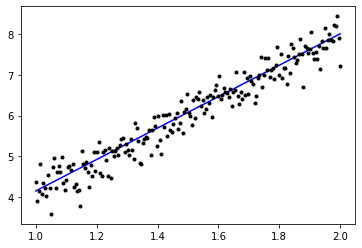

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 가상적인 데이터 생성
X = data = np.linspace(1, 2, 200)   # 시작값=1, 종료값=2, 개수=200
y = X * 4 + np.random.randn(200) * 0.3  # x를 4배로 하고 편차 0.3 정도의 가우시간 잡음 추가

model = Sequential()
model.add(Dense(1, input_dim=1, activation="linear"))
model.compile(optimizer="sgd", loss="mse", metrics=["mse"])
model.fit(X, y, batch_size=1, epochs=30)

predict = model.predict(data)

plt.plot(data, predict, "b", data, y, "k.")   #첫번째 그래프는 파란색 마커로
plt.show()
# 두번째 그래프는 검정색 "."으로 그린다.

In [16]:
# 선형회귀식 도출
import numpy as np

X = [2,4,6,8]
Y = [81, 93, 91, 97]

mX = np.mean(X)
mY = np.mean(Y)

eX = X - mX
eY = Y - mY

slope = np.dot(eX, eY) / np.dot(eX, eX)

b = mY - slope*mX

print(f"y = {slope}x + {b}")

y = 2.3x + 79.0
